In [1]:
import math
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../../exports/appa1_shrinked.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)

In [4]:
appa_hours.columns

Index(['Unnamed: 0.1', 'Time', 'ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2',
       'WO3_1', 'WO3_2', 'ZnOR_1_heatR', 'ZnOR_2_heatR', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV',
       'ZnOR_2_heatV', 'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 'WO3_1_heatV',
       'WO3_2_heatV', 'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_Age', 'ZnOR_2_Age', 'LaFeO3_1_Age', 'LaFeO3_2_Age', 'WO3_1_Age',
       'WO3_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate', 'year', 'UV',
       'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10', 'NO2', 'SO2',
       'O3', 'CO'],
      dtype='object')

In [5]:
appa_hours = appa_hours[
    (appa_hours.Time > "2021-05-01")
    & (appa_hours.Time < "2021-11-15")
]

#TODO: Mettere i grafici dei valori con alte correlazione insieme ed esaminare pezzo per pezzo

In [6]:
appa_hours.loc[appa_hours.LaFeO3_1 > 15*10**6, 'LaFeO3_1'] = np.nan
appa_hours = appa_hours.dropna()

In [7]:
fig = px.line(x=appa_hours.Time, y=appa_hours.WO3_1)
fig.add_scatter(x=appa_hours.Time,  y=appa_hours.WO3_2, mode='lines', opacity=0.5)
fig.show()

In [165]:
# appa_hours = appa_hours[
#     (appa_hours.Time > "2021-05-01")
#     & (appa_hours.Time < "2021-06-29")
# ]

In [9]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'ZnOR_1_heatV', 'ZnOR_2_heatV', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'WO3_1_heatV','WO3_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age', 
    'WO3_1_Age', 'WO3_2_Age', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',  
    'UV', 'Rain', 
    'Wind_Speed',
    'NO2', 'O3', 'CO'
]]

In [8]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
   'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
   'Wind_Speed',
    'NO2', 'O3'
]]

In [12]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'NO2', 'O3', 'CO'
]]

# Random Forest

In [9]:
#Selecting the features
cols = [
        'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
   'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
   'Wind_Speed'
]

#Selecting the target
outs = ['NO2','O3']

In [14]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
]



#Selecting the target
outs = ['NO2', 'O3', 'CO']
#outs = ['O3',]

In [102]:
#splitting the values in training and test
#Va a prendere troppi valori bassi e lascia in fondo all'array quelli alti
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]


In [10]:
features = appa_hours[cols]
targets = appa_hours[outs]

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.20, random_state=42, shuffle = False)

In [170]:
# rf_random = pickle.load(open('../../../models/model_weather1_ultimate(2).sav', 'rb'))
# bla = rf_random.best_estimator_
# bla.fit(X_train, Y_train)

# bla.feature_importances_,


In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1100, num= 20)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num= 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [9,10,11]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 152, 205, 257, 310, 363, 415, 468, 521, 573, 626, 678, 731, 784, 836, 889, 942, 994, 1047, 1100], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [9, 10, 11], 'min_samples_leaf': [2, 3], 'bootstrap': [True, False]}


In [12]:
model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=500, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)

In [13]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [9, 10, 11],
                                        'n_estimators': [100, 152, 205, 257,
                                                         310, 363, 415, 468,
                                                         521, 573, 626, 678,
                                                         731, 784, 836, 889,
                                                         942, 994, 1047,
                                                         1100]},
                   random_state=42, verbose=2)

In [14]:
rf_random.score(X_train, Y_train), rf_random.score(X_test, Y_test)

(0.9432431632648175, 0.16959763933783017)

Sono arrivato qui, ora devi eseguire questi: ↓

<AxesSubplot:xlabel='feature'>

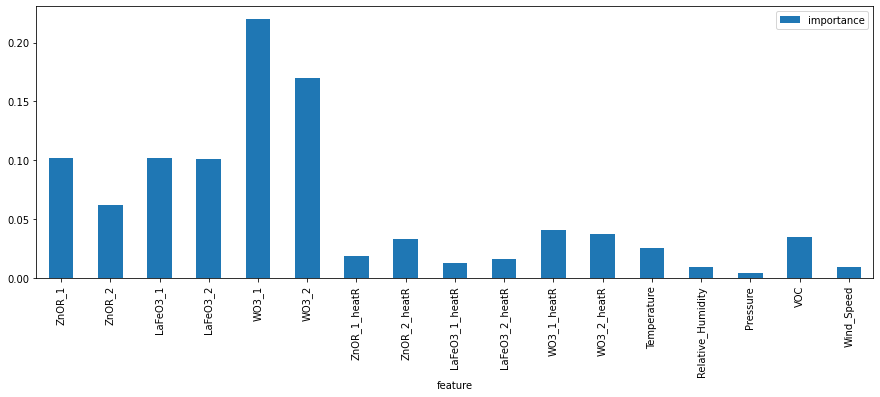

In [15]:
pd.DataFrame({"importance": rf_random.best_estimator_.feature_importances_, "feature": X_train.columns}).plot.bar("feature", "importance", figsize=(15, 5))

(array([0.06522115, 0.0646715 , 0.1928966 , 0.07510222, 0.22460966,
        0.13867387, 0.02347686, 0.03798135, 0.01202225, 0.02004804,
        0.05637547, 0.0547291 , 0.01231702, 0.00433998, 0.00241824,
        0.0129459 , 0.0021708 ]),)

<AxesSubplot:xlabel='feature'>

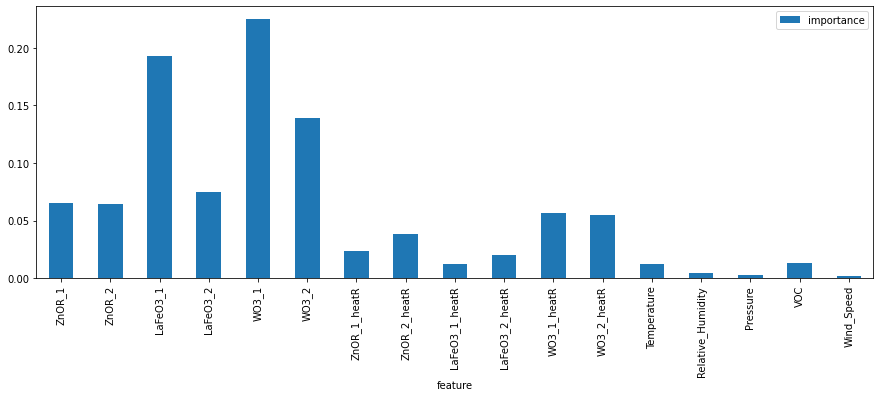

In [179]:
appa_hours.corr().style.background_gradient(cmap='coolwarm')

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,WO3_1_heatR,WO3_2_heatR,Temperature,Relative_Humidity,Pressure,VOC,Wind_Speed,NO2,O3
ZnOR_1,1.000000,0.911131,-0.670022,-0.671716,0.568933,0.914823,0.000815,0.014298,0.003931,-0.009982,0.012658,0.003731,-0.146961,0.083587,0.082427,0.210286,0.297436,-0.488717,0.678764
ZnOR_2,0.911131,1.000000,-0.645993,-0.637746,0.677442,0.831028,0.144280,-0.011100,-0.216828,-0.196589,-0.157825,-0.150825,-0.374088,0.164100,0.132003,0.309551,0.317309,-0.447097,0.667088
LaFeO3_1,-0.670022,-0.645993,1.000000,0.993122,-0.605462,-0.608467,0.371616,0.496515,0.475504,0.500030,0.509205,0.523391,0.040392,-0.291858,-0.012908,-0.358035,-0.336231,0.498216,-0.732835
LaFeO3_2,-0.671716,-0.637746,0.993122,1.000000,-0.592815,-0.613318,0.363470,0.482958,0.462215,0.486585,0.492675,0.507330,0.040162,-0.284878,0.003500,-0.350682,-0.333585,0.493762,-0.726695
WO3_1,0.568933,0.677442,-0.605462,-0.592815,1.000000,0.666762,-0.137774,-0.370645,-0.552211,-0.547303,-0.488195,-0.479489,-0.309956,0.110685,-0.134649,0.706696,0.398874,-0.407955,0.748143
WO3_2,0.914823,0.831028,-0.608467,-0.613318,0.666762,1.000000,-0.047166,-0.044801,-0.055129,-0.074459,-0.042151,-0.051114,-0.195284,0.168474,0.065875,0.338683,0.321834,-0.431457,0.737679
ZnOR_1_heatR,0.000815,0.144280,0.371616,0.363470,-0.137774,-0.047166,1.000000,0.866998,0.383920,0.503214,0.554305,0.595976,-0.441702,-0.340325,0.277238,-0.135871,-0.135847,0.347079,-0.423298
ZnOR_2_heatR,0.014298,-0.011100,0.496515,0.482958,-0.370645,-0.044801,0.866998,1.000000,0.789450,0.861194,0.893998,0.914871,-0.174303,-0.428013,0.241034,-0.297923,-0.199172,0.382953,-0.539604
LaFeO3_1_heatR,0.003931,-0.216828,0.475504,0.462215,-0.552211,-0.055129,0.383920,0.789450,1.000000,0.989600,0.969831,0.957345,0.288024,-0.395416,0.128843,-0.400214,-0.213101,0.284596,-0.484253
LaFeO3_2_heatR,-0.009982,-0.196589,0.500030,0.486585,-0.547303,-0.074459,0.503214,0.861194,0.989600,1.000000,0.982278,0.976430,0.231379,-0.432393,0.166030,-0.395206,-0.225370,0.313552,-0.522058


In [58]:
appa_hours.corr().style.background_gradient(cmap='coolwarm')

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,WO3_1_heatR,WO3_2_heatR,Temperature,Relative_Humidity,Pressure,VOC,Wind_Speed,NO2,O3
ZnOR_1,1.000000,0.911131,-0.670022,-0.671716,0.568933,0.914823,0.000815,0.014298,0.003931,-0.009982,0.012658,0.003731,-0.146961,0.083587,0.082427,0.210286,0.297436,-0.488717,0.678764
ZnOR_2,0.911131,1.000000,-0.645993,-0.637746,0.677442,0.831028,0.144280,-0.011100,-0.216828,-0.196589,-0.157825,-0.150825,-0.374088,0.164100,0.132003,0.309551,0.317309,-0.447097,0.667088
LaFeO3_1,-0.670022,-0.645993,1.000000,0.993122,-0.605462,-0.608467,0.371616,0.496515,0.475504,0.500030,0.509205,0.523391,0.040392,-0.291858,-0.012908,-0.358035,-0.336231,0.498216,-0.732835
LaFeO3_2,-0.671716,-0.637746,0.993122,1.000000,-0.592815,-0.613318,0.363470,0.482958,0.462215,0.486585,0.492675,0.507330,0.040162,-0.284878,0.003500,-0.350682,-0.333585,0.493762,-0.726695
WO3_1,0.568933,0.677442,-0.605462,-0.592815,1.000000,0.666762,-0.137774,-0.370645,-0.552211,-0.547303,-0.488195,-0.479489,-0.309956,0.110685,-0.134649,0.706696,0.398874,-0.407955,0.748143
WO3_2,0.914823,0.831028,-0.608467,-0.613318,0.666762,1.000000,-0.047166,-0.044801,-0.055129,-0.074459,-0.042151,-0.051114,-0.195284,0.168474,0.065875,0.338683,0.321834,-0.431457,0.737679
ZnOR_1_heatR,0.000815,0.144280,0.371616,0.363470,-0.137774,-0.047166,1.000000,0.866998,0.383920,0.503214,0.554305,0.595976,-0.441702,-0.340325,0.277238,-0.135871,-0.135847,0.347079,-0.423298
ZnOR_2_heatR,0.014298,-0.011100,0.496515,0.482958,-0.370645,-0.044801,0.866998,1.000000,0.789450,0.861194,0.893998,0.914871,-0.174303,-0.428013,0.241034,-0.297923,-0.199172,0.382953,-0.539604
LaFeO3_1_heatR,0.003931,-0.216828,0.475504,0.462215,-0.552211,-0.055129,0.383920,0.789450,1.000000,0.989600,0.969831,0.957345,0.288024,-0.395416,0.128843,-0.400214,-0.213101,0.284596,-0.484253
LaFeO3_2_heatR,-0.009982,-0.196589,0.500030,0.486585,-0.547303,-0.074459,0.503214,0.861194,0.989600,1.000000,0.982278,0.976430,0.231379,-0.432393,0.166030,-0.395206,-0.225370,0.313552,-0.522058


C:\Users\londe\AppData\Local\Temp\ipykernel_10052\4003145675.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



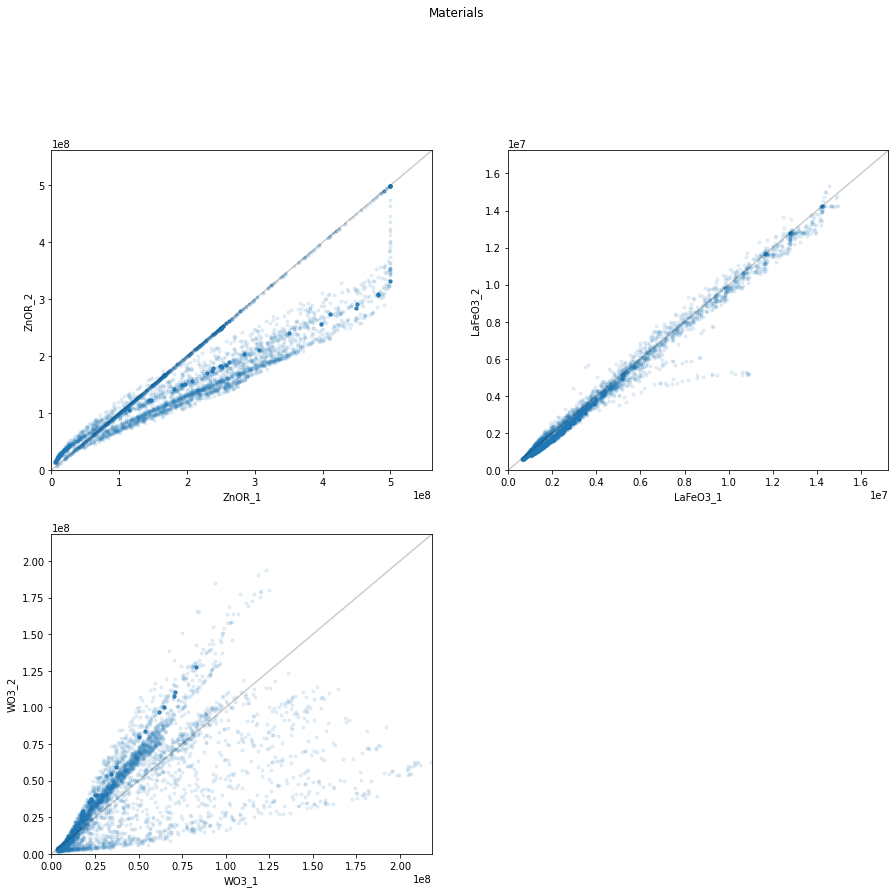

In [181]:
materials = [('ZnOR_1', 'ZnOR_2'), ('LaFeO3_1', 'LaFeO3_2'), ('WO3_1', 'WO3_2')]

fig = plt.figure(figsize=(15, 20))
fig.suptitle('Materials')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, material in enumerate(materials):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(appa_hours[material[0]], appa_hours[material[1]], marker=".", alpha=0.1)
    ax.set_xlabel(material[0])
    ax.set_ylabel(material[1])
    ax.set_xlim(0, appa_hours[material[1]].max()*9/8)
    ax.set_ylim(0, appa_hours[material[1]].max()*9/8)
    ax.plot([-100, appa_hours[material[1]].max()*10], [-100,  appa_hours[material[1]].max()*10], c="k", alpha=0.2)
    fig.add_subplot(ax)
fig.show()

C:\Users\londe\AppData\Local\Temp\ipykernel_16784\299864106.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



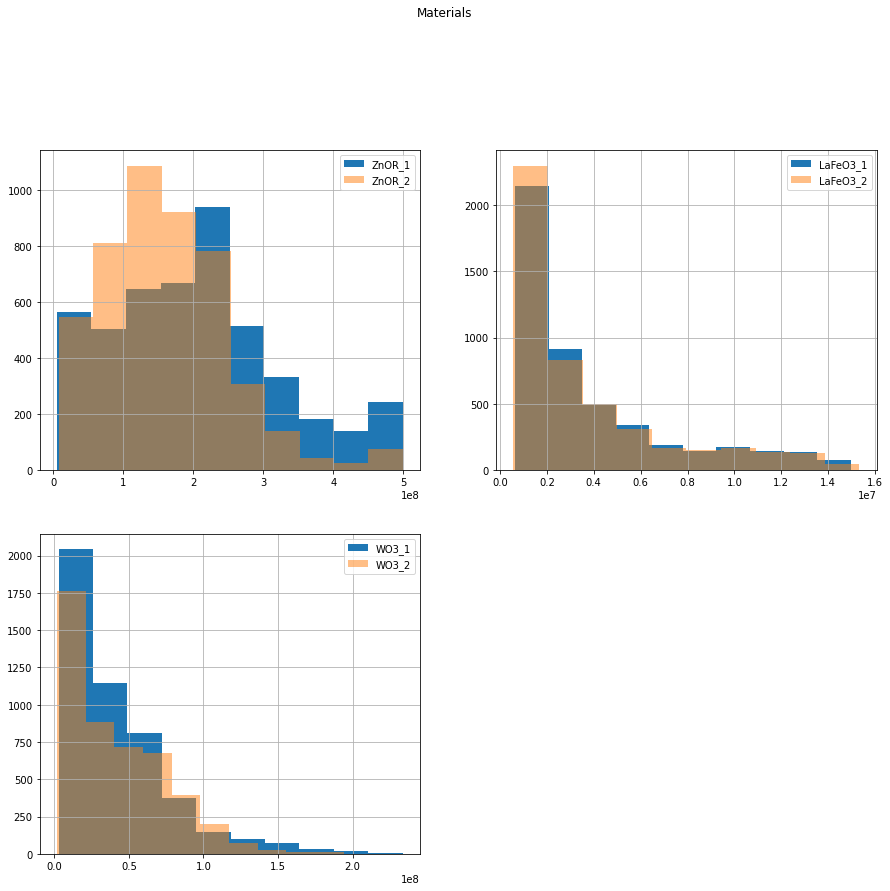

In [16]:
from cProfile import label


materials = [('ZnOR_1', 'ZnOR_2'), ('LaFeO3_1', 'LaFeO3_2'), ('WO3_1', 'WO3_2')]

fig = plt.figure(figsize=(15, 20))
fig.suptitle('Materials')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, material in enumerate(materials):
     ax = plt.Subplot(fig, outer[index])
     ax = appa_hours[material[0]].hist(ax=ax, label=material[0])
     ax = appa_hours[material[1]].hist(alpha=0.5, ax=ax, label=material[1])
     ax.legend()
     fig.add_subplot(ax)
fig.show()

C:\Users\londe\AppData\Local\Temp\ipykernel_16784\2257861954.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



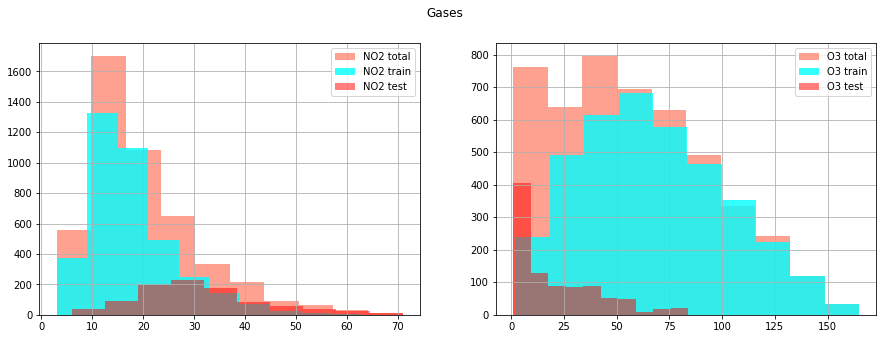

In [17]:
from turtle import color


gases = Y_train.columns

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Gases')
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
for index, gas in enumerate(gases):
     ax = plt.Subplot(fig, outer[index])
     ax = appa_hours[gas].hist(alpha=0.6, ax=ax, label=f"{gas} total", color="tomato")
     ax = Y_train[gas].hist(alpha=0.8, ax=ax, label=f"{gas} train", color="aqua")
     ax = Y_test[gas].hist(alpha=0.5, ax=ax, label=f"{gas} test",color="red")
     
     ax.legend()
     fig.add_subplot(ax)
fig.show()

In [184]:
for index, value in enumerate([('AB', 'CD'), ('EF', 'GH')]):
    print(index,value)

0 ('AB', 'CD')
1 ('EF', 'GH')


In [185]:
appa_hours.NO2.describe()

count    4742.000000
mean       20.087727
std        10.847425
min         3.000000
25%        13.000000
50%        17.000000
75%        25.000000
max        71.000000
Name: NO2, dtype: float64

In [154]:
appa_hours.NO2.value_counts()

14.0    301
13.0    280
16.0    254
15.0    250
11.0    219
       ... 
65.0      2
67.0      2
71.0      1
69.0      1
68.0      1
Name: NO2, Length: 68, dtype: int64

In [156]:
Y_test.NO2.value_counts()

14.0    79
13.0    65
12.0    64
16.0    54
10.0    53
9.0     52
11.0    52
18.0    48
15.0    47
17.0    42
8.0     41
19.0    36
20.0    36
21.0    27
23.0    22
24.0    22
22.0    21
25.0    15
28.0    15
7.0     14
27.0    13
29.0    11
26.0    10
32.0     9
31.0     8
37.0     8
33.0     7
34.0     7
45.0     6
40.0     6
42.0     6
6.0      6
5.0      6
30.0     6
35.0     6
36.0     5
39.0     5
41.0     3
38.0     3
44.0     2
43.0     2
4.0      2
48.0     1
52.0     1
47.0     1
46.0     1
49.0     1
51.0     1
Name: NO2, dtype: int64

C:\Users\londe\AppData\Local\Temp\ipykernel_16784\1563354019.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



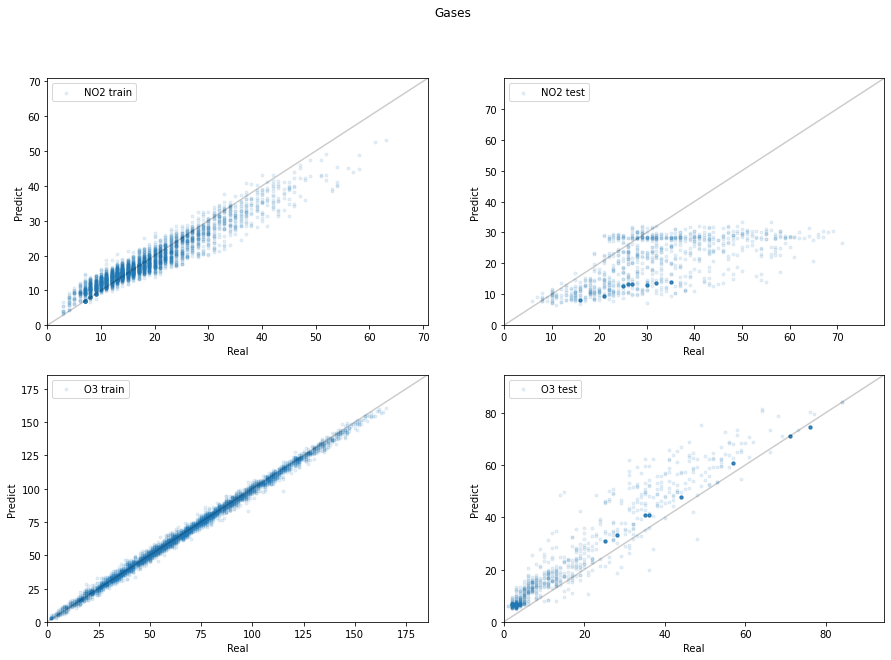

In [18]:
gases = Y_train.columns
Y_X_values = [(Y_train, X_train), (Y_test, X_test)]

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gases')
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)
index = 0
for gas_index, gas in enumerate(gases):
    for X_Y_index,Y_X in enumerate(Y_X_values):
        ax = plt.Subplot(fig, outer[index])
        ax.scatter(Y_X[0][gas], rf_random.predict(Y_X[1])[:,gas_index], marker=".", alpha=0.1, label=f"{gas} {'train' if X_Y_index == 0 else 'test'}")
        ax.set_xlabel(f"Real")
        ax.set_ylabel(f"Predict")
        ax.set_xlim(0, Y_X[0][gas].max()*9/8)
        ax.set_ylim(0, Y_X[0][gas].max()*9/8)
        ax.plot([-100, Y_train[gas].max()*10], [-100,  Y_train[gas].max()*10], c="k", alpha=0.2)
        ax.legend()
        fig.add_subplot(ax)
        index += 1
fig.show()

In [65]:
#Creating a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results_weather1_ultimate(2).csv')

In [66]:
# Save the model itself in a .sav file
pickle.dump(rf_random, open('model_weather2_ultimate(2).sav', 'wb'))

## Results

In [67]:
rf_random = pickle.load(open("models/model_weather2_ultimate(2).sav", "rb"))
rf_random

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_weather2_ultimate(2).sav'

In [139]:
print("NO2: " + str(percentage(mean_absolute_error(Y_test.NO2 , rf_random.predict(X_test)[: ,0]), Y_test.NO2.describe())))
print("O3: " + str(percentage(mean_absolute_error(Y_test.O3 , rf_random.predict(X_test)[: ,1]), Y_test.NO2.describe())))
print("CO: " + str(percentage(mean_absolute_error(Y_test.CO , rf_random.predict(X_test)[: ,2]), Y_test.NO2.describe())))
print("Total: " + str(percentage(mean_absolute_error(Y_test , rf_random.predict(X_test)), Y_test.describe())))

NameError: name 'percentage' is not defined

In [79]:
Y_test.O3.describe()

count    948.000000
mean      69.531646
std       29.017601
min        7.000000
25%       48.000000
50%       68.000000
75%       90.250000
max      145.000000
Name: O3, dtype: float64

## Hyper Parameters Plots

In [204]:
rf_random.cv_results_

{'mean_fit_time': array([34.56166585, 20.82399519, 12.71933436, 10.75499805, 16.37500286,
         1.22800167,  7.04133209, 21.80966218, 12.49099843, 19.07866693,
         8.16633463,  4.21266397, 12.45733237, 10.97133319, 16.97066553,
        13.04833515, 20.83833281,  4.49366657, 16.85266447,  1.57266347,
         2.9766655 , 13.85966818, 19.13833181, 18.48000018,  1.01333141,
        22.72832926,  1.51866651,  3.37999686,  1.34899839, 10.73933204,
        28.03766338,  7.27199896,  3.10656754,  8.5446647 , 18.0993305 ,
        21.21533322, 21.10666545,  7.01633302,  4.70833103, 15.62166468,
         3.78799995, 26.1386652 , 14.85066493,  0.87833198,  9.42199945,
         9.24366625,  9.4936626 ,  5.96033311, 14.11733166,  3.95899924,
        17.74832948, 10.14133263, 12.45533371, 14.00499765,  8.32133285,
        16.41766302, 23.96899883,  2.66299852, 18.22666581, 14.61000029,
         6.52999965, 16.28166771, 11.68466528,  0.85666323,  0.85700123,
        12.26333078, 12.5046653 , 

In [20]:
ris = pd.DataFrame(rf_random.cv_results_)
ris.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

C:\Users\londe\AppData\Local\Temp\ipykernel_16784\3435337682.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



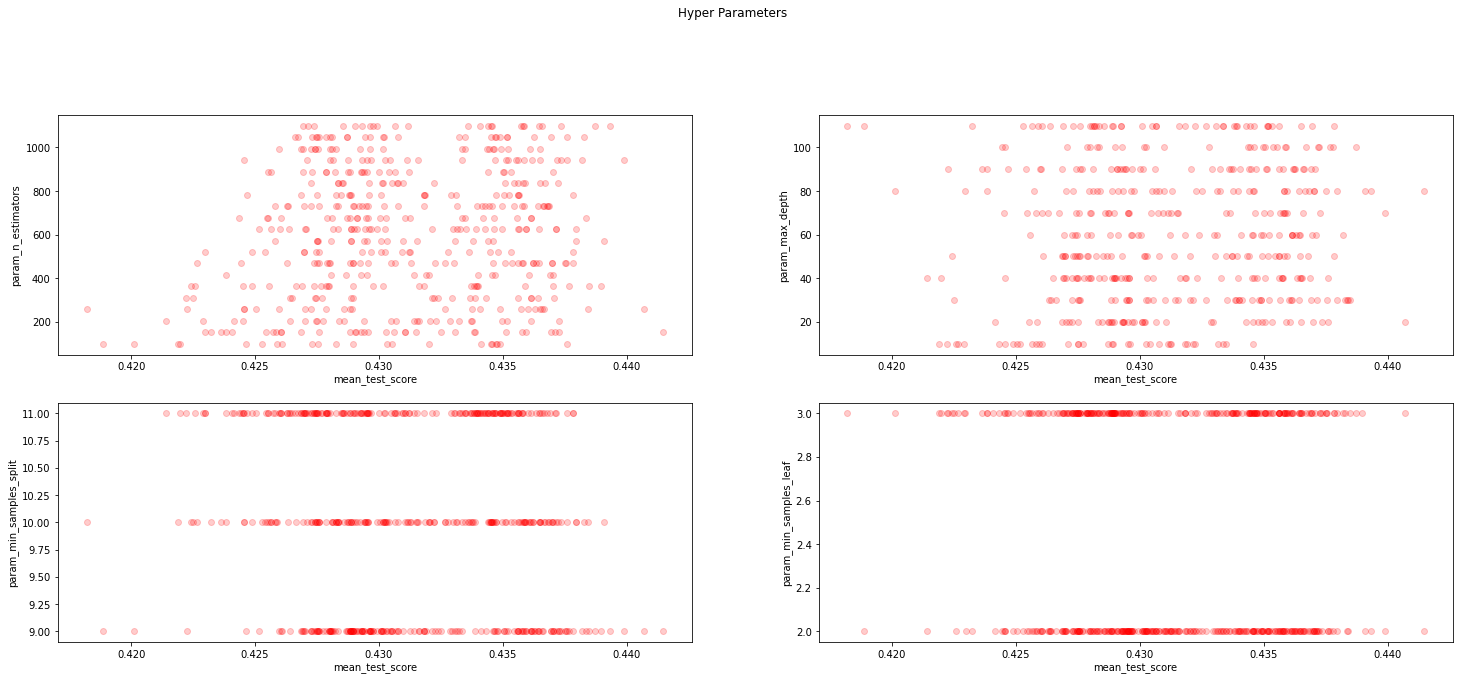

In [22]:
#Plotting the hyper-parameters in relation of mean test score
#Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
#On the X scale, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.2, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

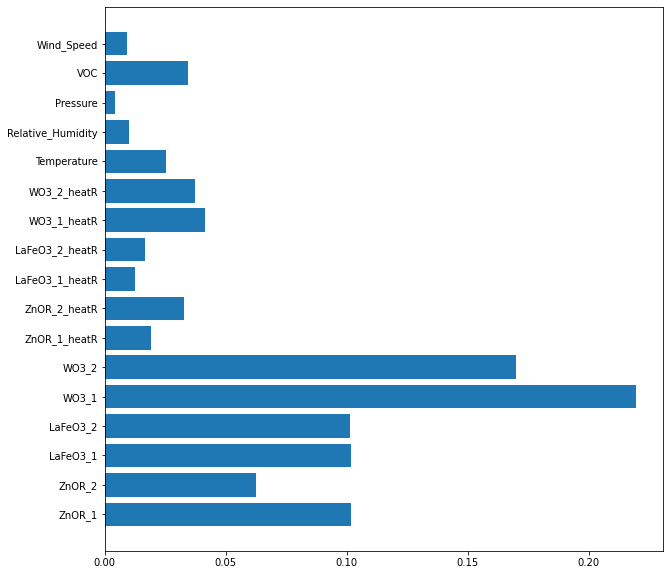

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

ValueError: x and y must be the same size

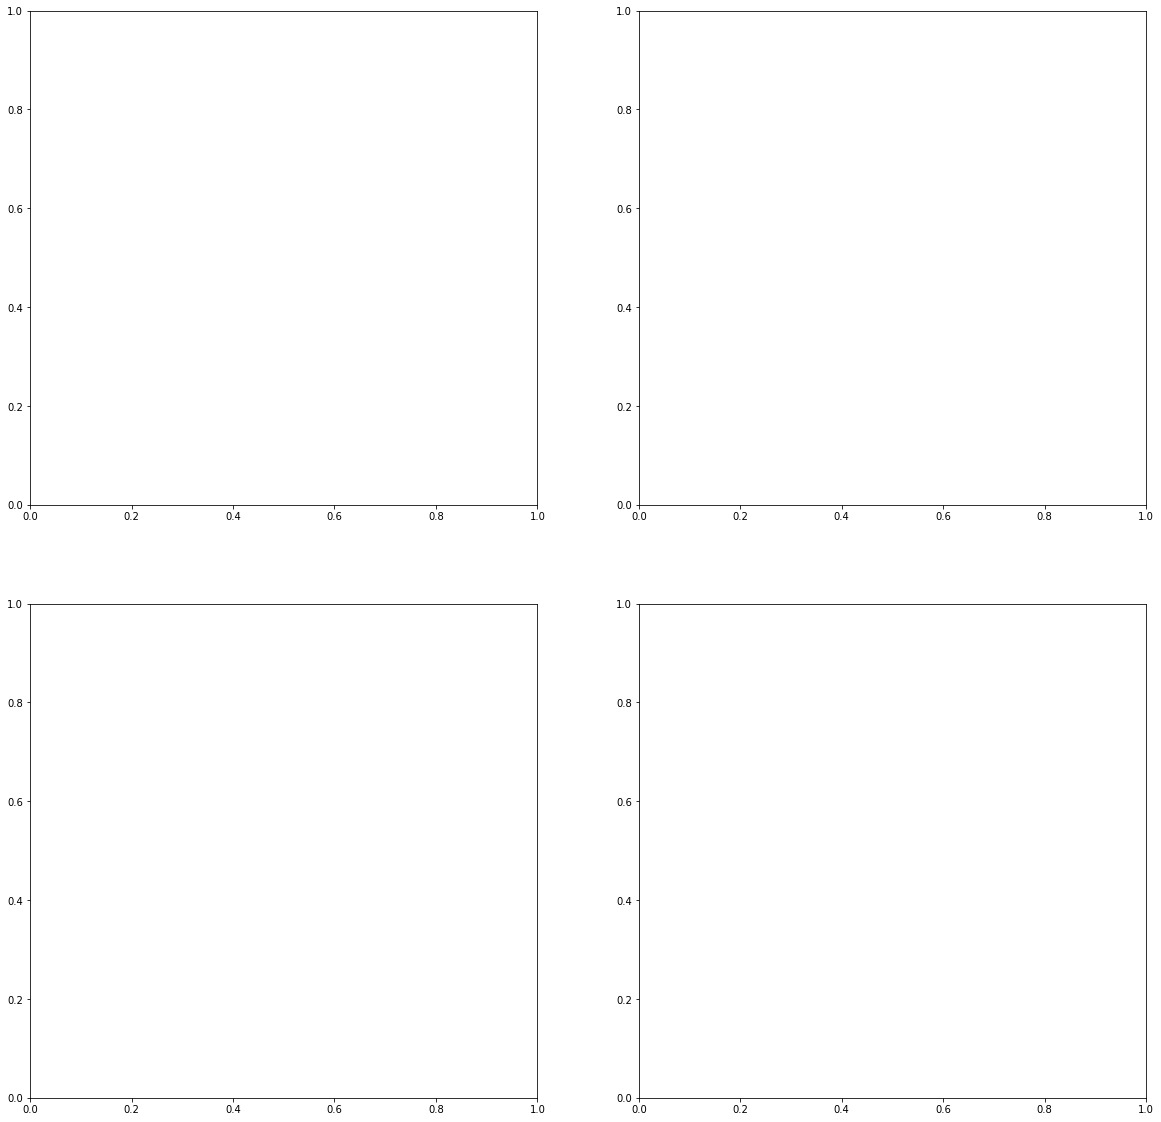

In [205]:
#Printing the charts to undersand better our predictions

fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# ax1.scatter(Y_test.NO2, rf_random.predict(X_test)[:, 0], label = "NO2")
ax2.scatter(Y_test.O3, rf_random.predict(X_test), label = "O3")

ax1.set_xlim(0, 120)
ax1.set_ylim(0, 120)
ax2.set_xlim(0, 150)
ax2.set_ylim(0, 150)
ax3.set_xlim(0.5, 1)
ax3.set_ylim(0.5, 1)

ax1.set_title('NO2')
ax1.set_xlabel('Real data')
ax1.set_ylabel('Prediciton')
ax2.set_title('O3')
ax2.set_xlabel('Real data')
ax2.set_ylabel('Prediciton')
ax3.set_title('CO')
ax3.set_xlabel('Real Data')
ax3.set_ylabel('Prediction')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

In [ ]:
appa_hours.O3